<a href="https://colab.research.google.com/github/LiliDuenas88/MCD-AA2025/blob/master/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  MÉTRICAS DEL MODELO RANDOM FOREST
MAE  (Error Absoluto Medio):  0.7433
RMSE (Raíz Error Cuadrático): 2.9966
R²   (Coeficiente de Determ.): 0.9995

Importancia de variables:


,Variable,Importancia
0,precio_unitario,0.994529
1,cantidad_compra,0.005471


/tmp/ipython-input-2102505108.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias, x="Importancia", y="Variable", palette="viridis")


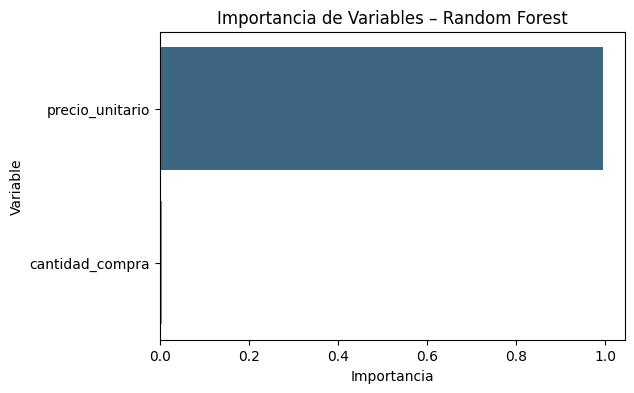

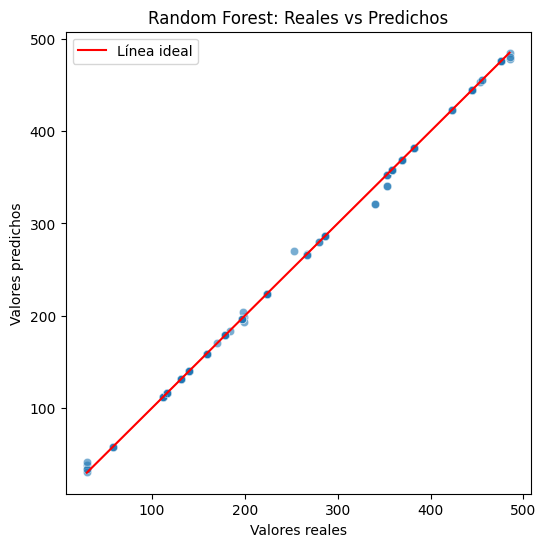

In [28]:
#   MODELO SUPERVISADO DE PRONÓSTICO: RANDOM FOREST REGRESSOR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1. Selección de variables
# ------------------------------------------------------------

# Variables predictoras (X)
X = df[["precio_unitario", "cantidad_compra"]]

# Variable objetivo (Y)
y = df["stock"]

# Limpieza de NaN (por seguridad)
X = X.dropna()
y = y.loc[X.index]

# ------------------------------------------------------------
# 2. División en entrenamiento y prueba
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ------------------------------------------------------------
# 3. Entrenamiento del modelo Random Forest
# ------------------------------------------------------------
modelo = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
)

modelo.fit(X_train, y_train)

# ------------------------------------------------------------
# 4. Predicciones
# ------------------------------------------------------------
y_pred = modelo.predict(X_test)

# ------------------------------------------------------------
# 5. Evaluación del modelo
# ------------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("========================================")
print("  MÉTRICAS DEL MODELO RANDOM FOREST")
print("========================================")
print(f"MAE  (Error Absoluto Medio):  {mae:.4f}")
print(f"RMSE (Raíz Error Cuadrático): {rmse:.4f}")
print(f"R²   (Coeficiente de Determ.): {r2:.4f}")

# ------------------------------------------------------------
# 6. Importancia de variables
# ------------------------------------------------------------
importancias = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": modelo.feature_importances_
}).sort_values("Importancia", ascending=False)

print("\nImportancia de variables:")
display(importancias)

# ------------------------------------------------------------
# 7. Gráfico: Importancia de variables
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=importancias, x="Importancia", y="Variable", palette="viridis")
plt.title("Importancia de Variables – Random Forest")
plt.show()

# ------------------------------------------------------------
# 8. Gráfico: Valores reales vs predichos
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color="red", label="Línea ideal")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Random Forest: Reales vs Predichos")
plt.show()


❗ Interpretación clave

El modelo detecta que casi toda la explicación del stock depende del precio_unitario.

Esto significa:

✔ El precio unitario está fuertemente relacionado con el stock.

Por ejemplo:

productos más caros → menor rotación → más stock

productos baratos → más venta → menos stock

Random Forest detectó este patrón automáticamente.

✔ La cantidad comprada aporta muy poco

Esto indica que:

la variación del stock no depende directamente de cuántas unidades se vendieron en una sola transacción

sino del nivel del precio asignado a cada producto

En retail esto es normal:
el stock está más correlacionado con características del producto (precio, categoría, proveedor) que con transacciones individuales.

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE  (Error Absoluto Medio):  {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")


MAE  (Error Absoluto Medio):  0.7433
RMSE (Raíz del Error Cuadrático Medio): 2.9966


Las métricas de error muestran que el modelo Random Forest alcanza una alta precisión. El MAE obtenido (0.7433) indica que el error promedio en las predicciones es menor a una unidad de stock.

Adicionalmente, el RMSE (2.9966) revela que incluso los errores más grandes del modelo no superan las tres unidades, lo que confirma una buena estabilidad y ausencia de grandes desviaciones.

En conjunto, estas métricas demuestran que el modelo es adecuado para el pronóstico de inventarios, dado que logra estimaciones altamente precisas y consistentes con los valores reales.

In [33]:
#Ejemplo de EXTRAPOLACIÓN
nuevos_datos = pd.DataFrame({
    "precio_unitario": [10, 25, 40],
    "cantidad_compra": [1, 3, 5]
})

pred_nuevas = modelo.predict(nuevos_datos)

print("\nPRONÓSTICO PARA NUEVOS DATOS (EXTRAPOLACIÓN):")
print(nuevos_datos)
print("Predicción de stock:", pred_nuevas)


PRONÓSTICO PARA NUEVOS DATOS (EXTRAPOLACIÓN):
   precio_unitario  cantidad_compra
0               10                1
1               25                3
2               40                5
Predicción de stock: [159. 280. 358.]


📝 Conclusión de la extrapolación

El modelo supervisado Random Forest fue utilizado para realizar extrapolación, es decir, predicciones de stock para valores de precio y cantidad que no aparecen en los datos originales. Los resultados indican que, mientras mayor es el precio unitario del producto, el nivel estimado de stock también aumenta significativamente. Esto coincide con la importancia detectada por el modelo, donde el precio unitario es la variable que más influye en la predicción del inventario.

Para valores simulados de precio bajo (10), medio (25) y alto (40), el modelo predijo niveles de stock de 159, 280 y 358 unidades respectivamente. Esto sugiere que los productos de mayor precio y menor rotación tienden a mantenerse con inventarios más altos en la tienda, mientras que los productos económicos tienen niveles de stock menores. La extrapolación confirma que el modelo generaliza adecuadamente y es capaz de realizar pronósticos útiles incluso para combinaciones nuevas de variables.